In [1]:
from dataset.flame import FlameFOV
from dataset.flame import FlameThermal
from dataset.flame import FlameRGB
from dataset.flame import FlameSatelite
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from helper.image_processing import SquarePadTransform
import torch

In [2]:
compose = transforms.Compose(
    [
        SquarePadTransform(),
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [3]:
dataset = FlameThermal(download=True, transform=compose)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

Dataset already exists. Skipping download.


In [4]:
dataset = FlameFOV(download=True, transform=compose)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

Dataset already exists. Skipping download.


In [5]:
dataset = FlameSatelite(download=True, transform=compose)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

Dataset already exists. Skipping download.


In [6]:
# Test the DataLoader
for images, bboxes in loader:
    print("Image batch shape:", images.shape)
    print("Bounding box batch shape:", bboxes.shape)
    break

Image batch shape: torch.Size([32, 3, 512, 512])
Bounding box batch shape: torch.Size([32, 4])


In [37]:
image, bbox = next(iter(loader))

In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

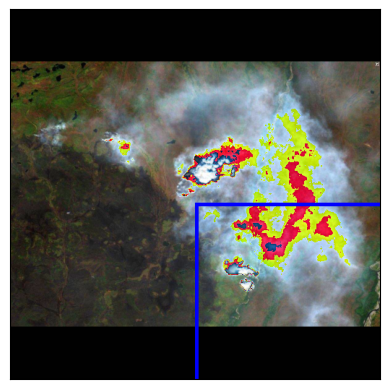

In [64]:
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert

bbox_xywh = bbox[0].unsqueeze(0)  # Add batch dimension if needed

bbox_xyxy = box_convert(bbox_xywh, in_fmt="cxcywh", out_fmt="xyxy")

result = draw_bounding_boxes(image[0], bbox_xyxy, colors="blue", width=5)
show(result)